In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = "/content/drive/MyDrive/CNN/xray_dataset_covid19/train"
test_path = "/content/drive/MyDrive/CNN/xray_dataset_covid19/test"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))


model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 110, 110, 64)     0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_11 (Conv2D)          (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                  

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 148 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary',
)

Found 40 images belonging to 2 classes.


In [ ]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 5,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2,
)

Epoch 1/10
5/5 [==============================] - 9s 2s/step - loss: 1.3836 - accuracy: 0.4730 - val_loss: 0.6857 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 7s 1s/step - loss: 0.6888 - accuracy: 0.5676 - val_loss: 0.6894 - val_accuracy: 0.5000
Epoch 3/10
5/5 [==============================] - 7s 1s/step - loss: 0.6814 - accuracy: 0.6689 - val_loss: 0.6219 - val_accuracy: 0.9750
Epoch 4/10
5/5 [==============================] - 7s 2s/step - loss: 0.5819 - accuracy: 0.7230 - val_loss: 0.5040 - val_accuracy: 0.8750
Epoch 5/10
5/5 [==============================] - 7s 1s/step - loss: 0.5443 - accuracy: 0.7297 - val_loss: 0.3778 - val_accuracy: 0.9750
Epoch 6/10
5/5 [==============================] - 7s 1s/step - loss: 0.4609 - accuracy: 0.7838 - val_loss: 0.3883 - val_accuracy: 0.9750
Epoch 7/10
5/5 [==============================] - 7s 1s/step - loss: 0.4184 - accuracy: 0.8041 - val_loss: 0.2272 - val_accuracy: 0.9750
Epoch 8/10
5/5 [=========================

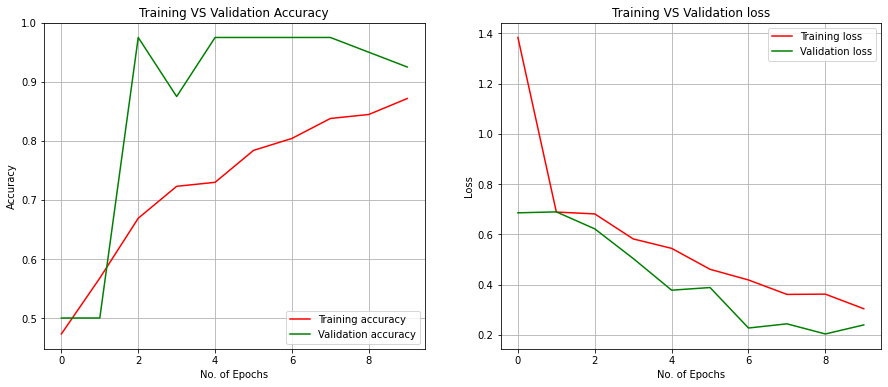

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'], 'r', label='Training accuracy')
plt.plot(hist.history['val_accuracy'], 'g', label='Validation accuracy')
plt.title('Training VS Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist.history['loss'], 'r', label='Training loss')
plt.plot(hist.history['val_loss'], 'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/CNN/xray_dataset_covid19/MODEL")

In [ ]:
model.evaluate(train_generator)

5/5 [==============================] - 6s 1s/step - loss: 0.3121 - accuracy: 0.9122


[0.31209176778793335, 0.912162184715271]

In [ ]:
model.evaluate(validation_generator)

2/2 [==============================] - 1s 184ms/step - loss: 0.2395 - accuracy: 0.9250


[0.23953938484191895, 0.925000011920929]

In [ ]:
y_actual = []
y_test = []

In [ ]:
import os
import random

In [ ]:
num = int( np.round(random.random()*20 ) )

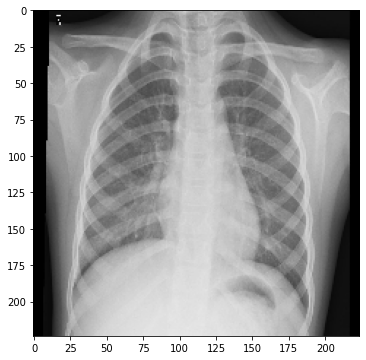

Predicted 0.0 but actually 0 


In [ ]:
counter = 0
for i in os.listdir(test_path+"/NORMAL/"):
  counter+=1
  img = image.load_img(test_path+"/NORMAL/"+i,target_size=(224,224,))
  y = img
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict(img)
  if counter == num:
    plt.figure(figsize=(6,6))
    plt.imshow(y)
    plt.show()
    print(f"Predicted {p[0,0]} but actually {0} ")
  y_test.append(p[0,0])
  y_actual.append(0)

In [ ]:
num = int( np.round(random.random()*20 ) )

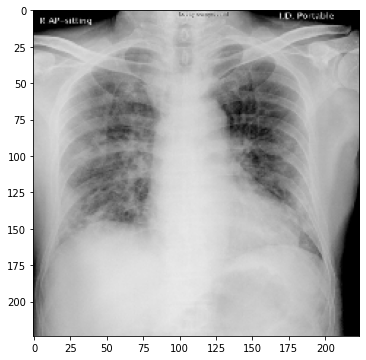

Predicted 0.9998230338096619 but actually 1 


In [ ]:
counter = 0
for i in os.listdir(test_path+"/PNEUMONIA/"):
  counter+=1
  img = image.load_img(test_path+"/PNEUMONIA/"+i,target_size=(224,224,))
  y = img
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict(img)
  if counter == num:
    plt.figure(figsize=(6,6))
    plt.imshow(y)
    plt.show()
    print(f"Predicted {p[0,0]} but actually {1} ")
  y_test.append(p[0,0])
  y_actual.append(1)

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
for i in range(len(y_test)):
  if y_test[i] < 0.5:
    y_test[i] = 0
  else:
    y_test[i] = 1

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_actual,y_test)

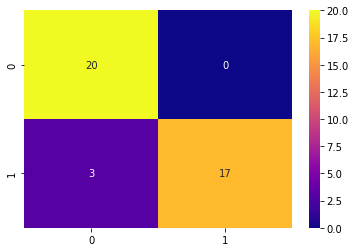

Accuracy Score: 0.925


In [ ]:
import seaborn as sns

sns.heatmap(cm,cmap="plasma",annot=True)
plt.show()

print(f"Accuracy Score: {accuracy_score(y_actual,y_test)}")